In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import scipy.ndimage as ndimage
from tqdm import tqdm_notebook
import community as cm
import networkx as nx
from collections import Counter
import pickle
from natsort import natsorted
from scipy.optimize import curve_fit

In [2]:
def fractal_model(generation,m,x,e):
	"""
	Returns the fractal model introduced by
	Song, Havlin, Makse in Nature Physics 2, 275.
	generation = number of generations
	m = number of offspring per node
	x = number of connections between offsprings
	e = probability that hubs stay connected
	1-e = probability that x offsprings connect.
	If e=1 we are in MODE 1 (pure small-world).
	If e=0 we are in MODE 2 (pure fractal).
	"""
	G=nx.Graph()
	G.add_edge(0,1) #This is the seed for the network (generation 0)
	node_index = 2
	for n in range(1,generation+1):
		all_links = list(G.edges())
		while all_links:
			link = all_links.pop()
			new_nodes_a = range(node_index,node_index + m)
			#random.shuffle(new_nodes_a)
			node_index += m
			new_nodes_b = range(node_index,node_index + m)
			#random.shuffle(new_nodes_b)
			node_index += m
			G.add_edges_from([(link[0],node) for node in new_nodes_a])
			G.add_edges_from([(link[1],node) for node in new_nodes_b])
			repulsive_links = list(zip(new_nodes_a,new_nodes_b))
			G.add_edges_from([repulsive_links.pop() for i in range(x-1)])
			if np.random.random() > e:
				G.remove_edge(link[0], link[1])
				new_edge = repulsive_links.pop()
				G.add_edge(new_edge[0], new_edge[1])
	return G

440 512


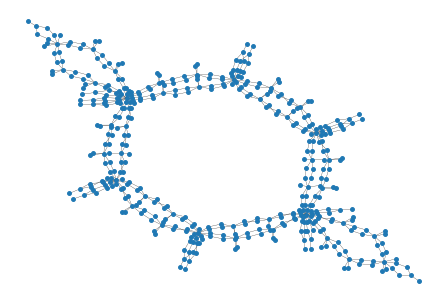

In [7]:
g = fractal_model(3,3,2,0)

layout = nx.kamada_kawai_layout(g)

print(g.number_of_nodes(), g.number_of_edges())
nx.draw(g, pos=layout, node_size=15, width=0.25)